In [1]:
import pandas as pd
from datetime import time, timedelta
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
df = pd.read_excel("garmin_activities.xlsx")

# Heart Rate and Average Pace Analysis
Showing the correlation between the average heart rate and pace in running activities

In [3]:
df_running = df[df["Activity Type"].isin(["Trail Running", "Running"])]

In [4]:
hr_list = df_running['Avg HR'].tolist()

pace_list = []

for pace in df_running['Avg Pace']:
    if isinstance(pace, time):
        pace_list.append(round(pace.hour + pace.minute/60, 2))
    
    elif isinstance(pace, timedelta):
        pace_list.append(round(pace.total_seconds() / 3600, 2))
    
    else:
        print(f'The value {pace} is not a pace')

In [5]:
def remove_outliers(data, lower_multiplier=1.5, upper_multiplier=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower = Q1 - lower_multiplier * IQR
    upper = Q3 + upper_multiplier * IQR
    return (data >= lower) & (data <= upper)

pace_array = np.array(pace_list)
hr_array = np.array(hr_list)

mask = remove_outliers(pace_array, lower_multiplier=5, upper_multiplier=2.5) #true ili false

pace_clean = pace_array[mask]
hr_clean = hr_array[mask]

## Scatter Chart Pace vs Heart Rate

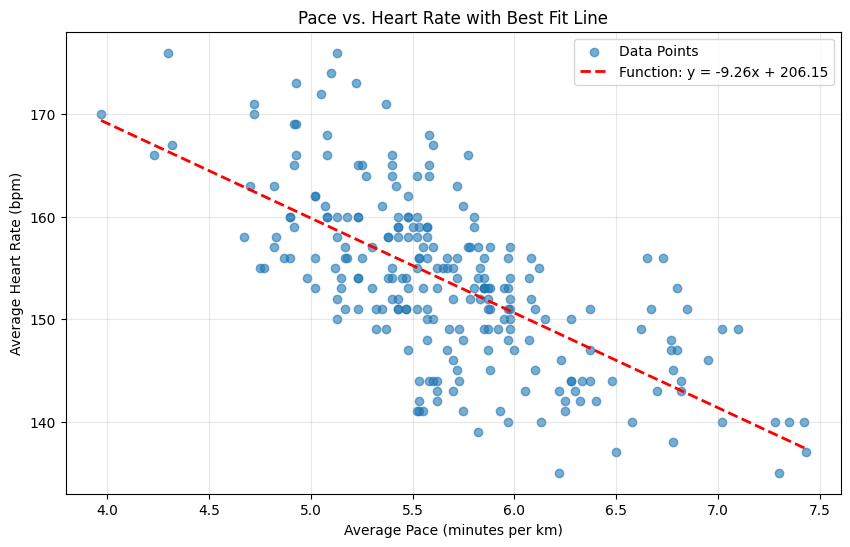

In [6]:
plt.figure(figsize=(10, 6)) 
plt.scatter(pace_clean, hr_clean, alpha=0.6, label='Data Points')

m, b = np.polyfit(pace_clean, hr_clean, 1)
x_fit = np.linspace(pace_clean.min(), pace_clean.max(), 100)
y_fit = m * x_fit + b
plt.plot(x_fit, y_fit, color='red', linestyle='--', linewidth=2, label=f'Function: y = {m:.2f}x + {b:.2f}')

plt.xlabel("Average Pace (minutes per km)")
plt.ylabel("Average Heart Rate (bpm)")
plt.title('Pace vs. Heart Rate with Best Fit Line')
plt.legend()
plt.grid(True, alpha=0.3)

# Activity Distribution - Bar Chart
Visualisation of the frequency of different type of activities using a bar chart

In [7]:
activity_count = df['Activity Type'].value_counts().reset_index()
activity_count.columns = ['Activity', 'Count']

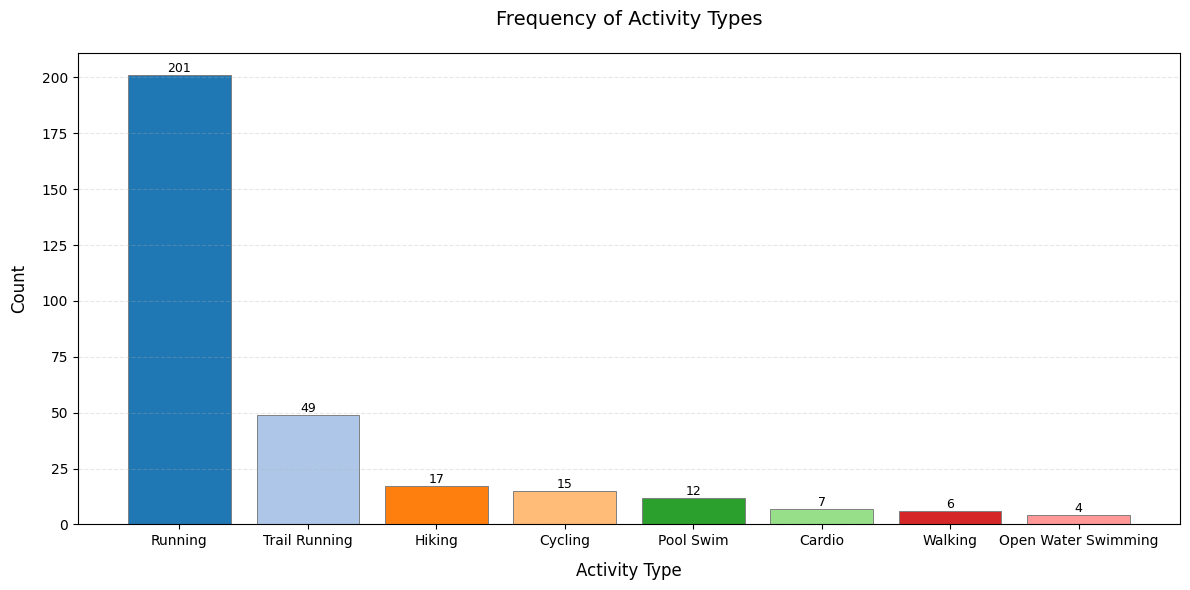

In [8]:
colors = plt.cm.tab20.colors  # Built-in colormap with 20 distinct colors

plt.figure(figsize=(12, 6))
bars = plt.bar(activity_count['Activity'], 
               activity_count['Count'],
               color=colors[:len(activity_count)],
               edgecolor='grey', 
               linewidth=0.7)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom',
             fontsize=9)

plt.title('Frequency of Activity Types', fontsize=14, pad=20)
plt.xlabel('Activity Type', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

# Average Cadence and Pace Analysis

In [9]:
cadence_array = np.array(df_running['Avg Run Cadence'].astype(float))
mask = remove_outliers(cadence_array)
cadence_clean = cadence_array[mask]
pace_clean = pace_array[mask]

## Scatter Chart and Best Line Fit Pace vs Cadence

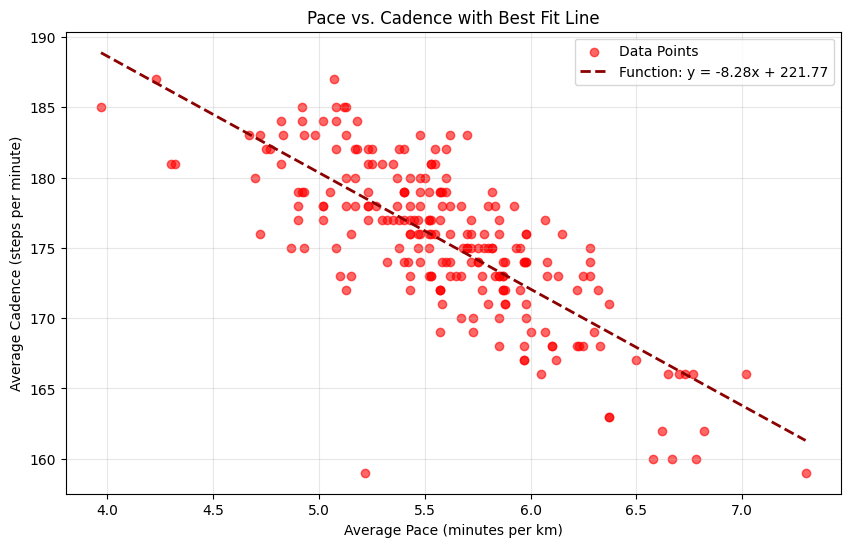

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(pace_clean, cadence_clean, alpha=0.6, label='Data Points', color='Red')

m, b = np.polyfit(pace_clean, cadence_clean, 1)
x_fit = np.linspace(pace_clean.min(), pace_clean.max(), 100)
y_fit = m * x_fit + b
plt.plot(x_fit, y_fit, color='darkred', linestyle='--', linewidth=2, label=f'Function: y = {m:.2f}x + {b:.2f}')

plt.xlabel("Average Pace (minutes per km)")
plt.ylabel("Average Cadence (steps per minute)")
plt.title('Pace vs. Cadence with Best Fit Line')
plt.legend()
plt.grid(True, alpha=0.3)

# Elevation Impact on Pace

In [11]:
elevation_array = np.array(df_running[df_running['Total Ascent'] != '--']['Total Ascent'].astype(float))
mask_for_NaN = df_running['Total Ascent'] != '--'

pace_clean_1 = pace_array[mask_for_NaN]
mask_for_outliers = remove_outliers(pace_clean_1, upper_multiplier=1.5, lower_multiplier=3)

elevation_clean = elevation_array[mask_for_outliers]
pace_clean = pace_clean_1[mask_for_outliers]

## Hexbin Pace and Ascent

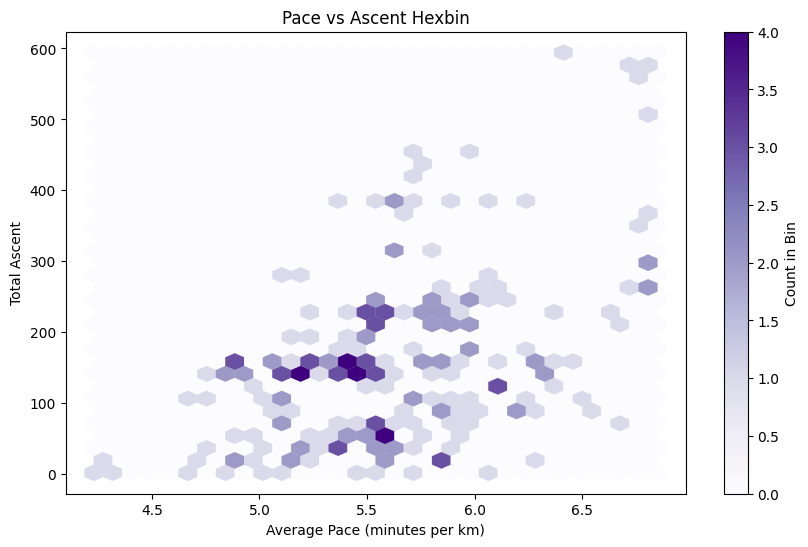

In [12]:
plt.figure(figsize=(10,6))
plt.hexbin(pace_clean, elevation_clean, gridsize=30, cmap='Purples', linewidths=0.2)
plt.colorbar(label='Count in Bin')
plt.xlabel("Average Pace (minutes per km)")
plt.ylabel("Total Ascent")
plt.title('Pace vs Ascent Hexbin')
plt.show()

## Scatter Chart Pace vs Ascent

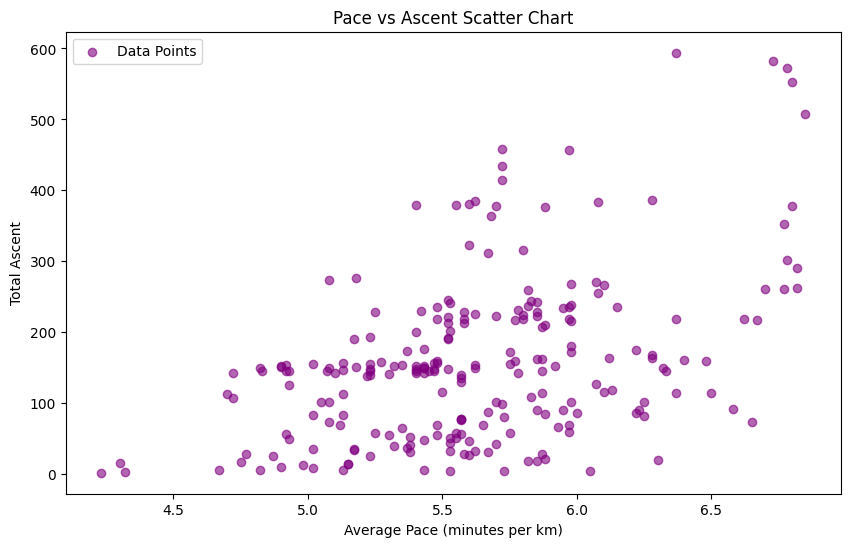

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(pace_clean, elevation_clean, alpha=0.6, label='Data Points', color='purple')
plt.xlabel("Average Pace (minutes per km)")
plt.ylabel("Total Ascent")
plt.title('Pace vs Ascent Scatter Chart')
plt.legend()
plt.show()

## 2D Histogram Density Plot of Ascent and Elevation

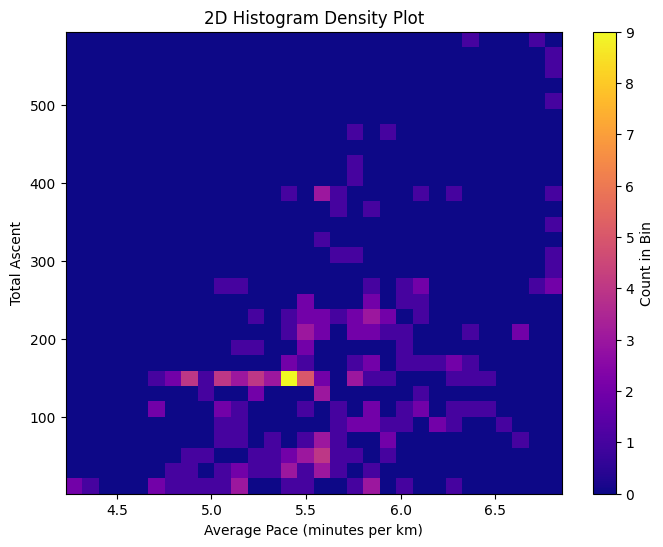

In [14]:
plt.figure(figsize=(8, 6))
plt.hist2d(pace_clean, elevation_clean, bins=(30, 30), cmap='plasma')
plt.colorbar(label='Count in Bin')
plt.xlabel('Average Pace (minutes per km)')
plt.ylabel('Total Ascent')
plt.title('2D Histogram Density Plot')
plt.show()